# Experiments on KuHar Resampled to 30Hz

This notebook will perform basic experiments on the balanced KuHar dataset with the following steps:
1. Quick load train, test and validation CSV subsets from the balanced KuHar dataset using `PandasDatasetsIO` helper
2. Subclassing the `Dataset` interface using `PandasMultiModalDataset`
3. Apply the fourier transform on the dataset
4. Train and evaluate SVM, KNN and Random Forest classification models in both time and frequency domains

The experiments will evaluate the performance of SVM, KNN and RF models on the balanced KuHar dataset in both time and frequency domains.

## Common imports and definitions

In [83]:
from pathlib import Path  # For defining dataset Paths
import sys                # For include librep package

# This must be done if librep is not installed via pip,
# as this directory (examples) is appart from librep package root
sys.path.append("..")

# Third party imports
import pandas as pd
import numpy as np

# Librep imports
from librep.utils.dataset import PandasDatasetsIO          # For quick load train, test and validation CSVs
from librep.datasets.multimodal import PandasMultiModalDataset # Wrap CSVs to librep's `Dataset` interface

## Loading data
Change the path to use in other datasets

In [84]:
# Path for KuHar resampled to 30Hz view with the same activities (and labels numbers)
# It is assumed that the directory will contain (train.csv, test.csv and validation.csv)
dataset_path_kuhar = Path("../data/views/KuHar/resampled_view_30Hz")
dataset_path_motionsense = Path("../data/views/MotionSense/resampled_view_30Hz")

Once paths is defined, we can load the CSV as pandas dataframes

In [85]:
# Kuhar/Motionsense dataframes
train_kuhar, validation_kuhar, test_kuhar = PandasDatasetsIO(dataset_path_kuhar).load()
train_motionsense, validation_motionsense, test_motionsense = PandasDatasetsIO(dataset_path_motionsense).load()

In [86]:
data_kuhar = pd.concat([train_kuhar, validation_kuhar, test_kuhar])
data_motionsense = pd.concat([train_motionsense, validation_motionsense, test_motionsense])

Lets take a look in the train dataframes

In [87]:
train_kuhar

,Unnamed: 0,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,...,gyro-z-89,accel-start-time,gyro-start-time,accel-end-time,gyro-end-time,activity code,length,serial,index,user
0,0,0.003620,-0.023688,-0.002657,0.010371,-0.005858,0.010423,-0.019593,0.000303,0.045433,...,0.003377,23.235,23.223,26.260,26.249,0,300,1,2100,1051
1,1,-0.005823,0.012494,-0.012503,-0.002116,0.025957,-0.012833,-0.025845,-0.011941,0.012807,...,0.003056,56.292,56.292,59.245,59.245,0,300,1,5700,1037
2,2,-0.039278,0.003864,0.008927,-0.024887,0.022435,0.003431,-0.038931,0.003359,0.009394,...,0.003442,27.268,27.267,30.290,30.291,0,300,1,2700,1075
3,3,-0.001728,-0.018312,0.013927,0.015426,0.007332,-0.012372,0.006893,-0.002433,0.012821,...,-0.001294,39.421,39.420,42.441,42.440,0,300,6,3900,1008
4,4,-0.022981,0.014871,-0.036310,0.033512,-0.016733,0.019930,-0.016637,0.007568,-0.002753,...,0.004560,23.703,23.703,26.656,26.656,0,300,1,2400,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,3325,-2.056244,-3.629712,-5.103134,-7.984378,-7.192343,-3.935411,8.426300,24.822963,4.338489,...,-0.051983,9.102,9.101,12.127,12.126,17,300,2,900,1087
3326,3326,-1.647790,-1.945329,5.476162,3.970667,0.271624,-4.150560,2.543954,-2.431491,-1.883694,...,0.869767,25.198,25.197,28.219,28.220,17,300,1,1800,1090
3327,3327,-0.316901,-0.551917,-1.592117,-0.877500,-0.323541,-0.768261,1.014809,2.774861,1.561735,...,0.198234,33.363,33.362,36.387,36.386,17,300,2,3300,1090
3328,3328,-1.888981,-0.294286,2.804385,1.476566,1.186552,0.976697,-0.997273,-2.450939,-2.028572,...,0.643595,84.916,84.915,87.939,87.938,17,300,2,8400,1090


In [88]:
data_kuhar

,Unnamed: 0,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,...,gyro-z-89,accel-start-time,gyro-start-time,accel-end-time,gyro-end-time,activity code,length,serial,index,user
0,0,0.003620,-0.023688,-0.002657,0.010371,-0.005858,0.010423,-0.019593,0.000303,0.045433,...,0.003377,23.235,23.223,26.260,26.249,0,300,1,2100,1051
1,1,-0.005823,0.012494,-0.012503,-0.002116,0.025957,-0.012833,-0.025845,-0.011941,0.012807,...,0.003056,56.292,56.292,59.245,59.245,0,300,1,5700,1037
2,2,-0.039278,0.003864,0.008927,-0.024887,0.022435,0.003431,-0.038931,0.003359,0.009394,...,0.003442,27.268,27.267,30.290,30.291,0,300,1,2700,1075
3,3,-0.001728,-0.018312,0.013927,0.015426,0.007332,-0.012372,0.006893,-0.002433,0.012821,...,-0.001294,39.421,39.420,42.441,42.440,0,300,6,3900,1008
4,4,-0.022981,0.014871,-0.036310,0.033512,-0.016733,0.019930,-0.016637,0.007568,-0.002753,...,0.004560,23.703,23.703,26.656,26.656,0,300,1,2400,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,373,-6.034685,-7.071957,2.971950,5.951306,8.887591,9.624808,9.076243,5.583828,1.522128,...,0.992015,37.326,37.325,40.351,40.350,17,300,2,3000,1089
374,374,2.251896,3.209599,0.621531,-1.775566,-3.100926,-3.248260,-2.501974,-3.749536,-3.144492,...,1.484934,24.261,24.260,27.284,27.283,17,300,1,2400,1088
375,375,1.633715,2.660286,3.447358,5.954687,0.959290,-5.371487,-10.108261,-5.651377,-6.051459,...,-0.368293,19.132,19.131,22.155,22.156,17,300,1,1200,1089
376,376,0.818880,-0.945890,-3.656753,-1.886847,0.807630,1.306009,-0.791855,-1.234935,0.992227,...,0.612118,61.589,61.588,64.609,64.608,17,300,1,5400,1089


In [89]:
activity_kuhar = {
        0: "Stand",
        1: "Sit",
        11: "Walk",
        14: "Run",
        15: "Stair-up",
        16: "Stair-down",
}

activity_motionsense = {
        3: "std",
        2: "sit",
        4: "wlk",
        5: "jog",
        1: "ups",
        0: "dws"
}

kh = list(activity_kuhar.keys())
ms = list(activity_motionsense.keys())
l = [k for k in range(6)]
kh

[0, 1, 11, 14, 15, 16]

In [90]:
data_kuhar = data_kuhar[data_kuhar['activity code'].isin(kh)]

In [91]:
data_kuhar['activity code'].unique()

array([ 0,  1, 11, 14, 15, 16])

In [92]:
for k in range(6):
    data_kuhar['activity code'] = data_kuhar['activity code'].replace(kh[k], k+6)
    data_kuhar['activity code']

/tmp/ipykernel_2239/4043591518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kuhar['activity code'] = data_kuhar['activity code'].replace(kh[k], k+6)


In [93]:
data_kuhar['activity code'].unique()

array([ 6,  7,  8,  9, 10, 11])

In [94]:
data_kuhar

,Unnamed: 0,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,...,gyro-z-89,accel-start-time,gyro-start-time,accel-end-time,gyro-end-time,activity code,length,serial,index,user
0,0,0.003620,-0.023688,-0.002657,0.010371,-0.005858,0.010423,-0.019593,0.000303,0.045433,...,0.003377,23.235,23.223,26.260,26.249,6,300,1,2100,1051
1,1,-0.005823,0.012494,-0.012503,-0.002116,0.025957,-0.012833,-0.025845,-0.011941,0.012807,...,0.003056,56.292,56.292,59.245,59.245,6,300,1,5700,1037
2,2,-0.039278,0.003864,0.008927,-0.024887,0.022435,0.003431,-0.038931,0.003359,0.009394,...,0.003442,27.268,27.267,30.290,30.291,6,300,1,2700,1075
3,3,-0.001728,-0.018312,0.013927,0.015426,0.007332,-0.012372,0.006893,-0.002433,0.012821,...,-0.001294,39.421,39.420,42.441,42.440,6,300,6,3900,1008
4,4,-0.022981,0.014871,-0.036310,0.033512,-0.016733,0.019930,-0.016637,0.007568,-0.002753,...,0.004560,23.703,23.703,26.656,26.656,6,300,1,2400,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,352,-3.241308,-1.151303,-3.636590,-0.687510,1.274872,1.804658,0.956298,0.000686,-0.568497,...,-0.136975,0.004,0.003,2.957,2.956,11,300,6,0,1045
353,353,-4.634808,-2.596363,-3.119754,-3.739037,-4.225704,-3.009355,1.613414,3.206659,0.533785,...,-0.717619,5.930,5.929,8.883,8.882,11,300,6,600,1045
354,354,-1.995855,0.405000,-3.540619,-4.913021,-5.872330,-1.481373,1.080134,-0.066989,0.242865,...,0.330508,52.048,52.035,55.036,55.025,11,300,1,5100,1044
355,355,7.927212,15.131813,5.008927,-1.928631,-2.497564,0.575235,-2.070881,-3.024012,-3.894229,...,0.297794,12.008,12.009,14.997,15.008,11,300,1,1200,1036


In [132]:
columns = np.array(dataset_motionsense.feature_columns + ['activity code'])
columns
X1 = np.array(data_motionsense[columns])

columns = np.array(dataset_kuhar.feature_columns + ['activity code'])
X2 = np.array(data_kuhar[columns])

# y = pd.concat([data_motionsense['activity code'], data_kuhar['activity code']])

In [118]:
all_data = pd.DataFrame(np.concatenate((X1, X2)), columns=columns)
all_data

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gyro-z-81,gyro-z-82,gyro-z-83,gyro-z-84,gyro-z-85,gyro-z-86,gyro-z-87,gyro-z-88,gyro-z-89,activity code
0,-0.186833,-0.179195,-0.226435,-0.234763,-0.267824,-0.234534,-0.235421,-0.133759,-0.297125,-0.319298,...,-0.243922,-0.067037,-0.193936,-0.174865,0.153844,0.456858,0.898804,1.139253,0.275556,0.0
1,-0.054442,0.260099,0.022933,0.019339,0.148599,-0.036896,-0.125777,-0.110877,0.016260,-0.023811,...,-0.887782,-1.077746,-0.313638,0.028681,0.848919,0.559802,0.253026,0.858864,0.799075,0.0
2,-0.007696,-0.009515,0.051284,-0.082342,0.046316,0.062557,-0.032338,-0.108787,-0.090480,-0.031549,...,-0.513046,0.029112,0.863525,0.595065,0.789453,0.495270,-0.042529,-0.161110,0.129157,0.0
3,-0.435023,-0.557701,-0.284523,0.142448,0.545683,0.363495,0.006622,-0.042397,-0.412486,-0.000627,...,0.228531,0.145406,1.439111,-0.160337,-1.073667,-0.531939,-0.302297,0.086762,0.600790,0.0
4,0.098066,0.398057,0.321284,-0.024039,0.372623,0.302234,0.199685,0.285311,0.319281,0.215437,...,-0.519878,-0.292381,0.083280,0.616030,0.884322,1.476072,1.630557,0.927239,0.672827,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,-3.241308,-1.151303,-3.636590,-0.687510,1.274872,1.804658,0.956298,0.000686,-0.568497,0.179736,...,-0.441983,-0.580914,-0.413660,0.199372,0.279733,0.710870,0.659130,-0.112992,-0.136975,11.0
6308,-4.634808,-2.596363,-3.119754,-3.739037,-4.225704,-3.009355,1.613414,3.206659,0.533785,-0.012920,...,-0.335914,0.489956,0.534633,0.059125,1.411111,0.908177,-0.439186,-1.091459,-0.717619,11.0
6309,-1.995855,0.405000,-3.540619,-4.913021,-5.872330,-1.481373,1.080134,-0.066989,0.242865,3.319765,...,0.751378,0.614308,0.224828,0.056776,-0.324035,-0.014972,-0.274811,-0.706501,0.330508,11.0
6310,7.927212,15.131813,5.008927,-1.928631,-2.497564,0.575235,-2.070881,-3.024012,-3.894229,-3.850194,...,0.659560,0.331278,0.208322,-1.206519,-0.749581,0.801543,0.463479,-0.188581,0.297794,11.0


In [136]:
tsne_df = tsne_model.fit_transform(all_data)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [156]:
label_per_dataset = pd.DataFrame(all_data['activity code'])
label_per_dataset['activity code'] = label_per_dataset['activity code'].replace([i for i in range(6)], 0)
label_per_dataset['activity code'] = label_per_dataset['activity code'].replace([i for i in range(6, 12)], 1)
label_per_dataset

,activity code
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
6307,1.0
6308,1.0
6309,1.0
6310,1.0


In [157]:
tsne_df = pd.DataFrame(tsne_df, columns=["X", "Y"])
tsne_df
tsne_df["class"] = label_per_dataset['activity code']

In [158]:
labels_ms = ['Downstairs', 'Upstairs', 'Sitting', 'Standing', 'Walking', 'Jogging']
labels_kh = ["Stand", "Sit", "Walk", "Run", "Stair-up", "Stair-down"]

classes = []
for c in labels_ms:
    classes.append(c + ' - MS')
for c in labels_kh:
    classes.append(c + ' - KH')
classes

['Downstairs - MS',
 'Upstairs - MS',
 'Sitting - MS',
 'Standing - MS',
 'Walking - MS',
 'Jogging - MS',
 'Stand - KH',
 'Sit - KH',
 'Walk - KH',
 'Run - KH',
 'Stair-up - KH',
 'Stair-down - KH']

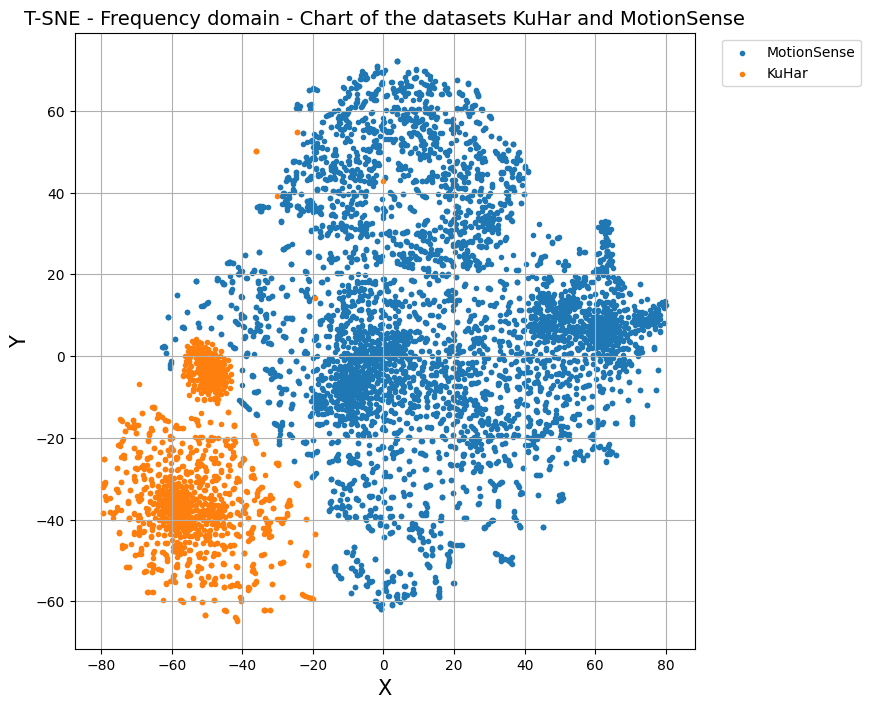

In [160]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_title("T-SNE - Frequency domain - Chart of the datasets KuHar and MotionSense", fontsize=14)

labels = []
for c, ds in tsne_df.groupby(["class"]):
    ax.scatter(ds["X"], ds["Y"], marker='.')
    if c  == 0:
        labels.append('MotionSense')
    else:
        labels.append('KuHar')
#     else:
#         labels.append(f"{c}")
ax.legend(labels, bbox_to_anchor = (1.28, 1.))
ax.grid()
# plt.savefig('results/tsne_KuHAR-v1_FrequencyDomain_6series-RF.pdf', transparent=True, bbox_inches='tight')
plt.show()   

## Train a linear model to separate the datasets

## Creating a Librep dataset from pandas dataframes

Change the features to use in other datasets

## Inspect sample

## t-SNE Transform

In [121]:
from sklearn.manifold import TSNE

In [122]:
tsne_model = TSNE(random_state=42)
tsne_df = tsne_model.fit_transform(all_data)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## Fourier Transform

In [ ]:
from librep.datasets.multimodal import TransformMultiModalDataset
from librep.transforms.fft import FFT

In [ ]:
fft_transform = FFT(centered = True)
transformer = TransformMultiModalDataset(transforms=[fft_transform], new_window_name_prefix="fft.")

### Use FFT in Kuhar

In [ ]:
train_dataset_fft_kuhar = transformer(train_dataset_kuhar)
validation_dataset_fft_kuhar = transformer(validation_dataset_kuhar)
test_dataset_fft_kuhar = transformer(test_dataset_kuhar)

In [ ]:
train_dataset_kuhar[:][0]

In [ ]:
train_dataset_fft_kuhar[:][0]

### Use FFT in MotionSense

In [ ]:
train_dataset_fft_motionsense = transformer(train_dataset_motionsense)
validation_dataset_fft_motionsense = transformer(validation_dataset_motionsense)
test_dataset_fft_motionsense = transformer(test_dataset_motionsense)

In [ ]:
train_dataset_motionsense[:][0]

In [ ]:
train_dataset_fft_motionsense[:][0]

## Train and evaluate t-

In [ ]:
from librep.utils.workflow import SimpleTrainEvalWorkflow, MultiRunWorkflow
# from librep.estimators import RandomForestClassifier
from sklearn.manifold import TSNE
from librep.metrics.report import ClassificationReport
import yaml

# reporter = ClassificationReport(use_accuracy=True, use_f1_score=True, use_classification_report=False, use_confusion_matrix=False, plot_confusion_matrix=False)
# experiment = SimpleTrainEvalWorkflow(estimator=TSNE, estimator_creation_kwags ={'n_estimators':100} , do_not_instantiate=False, do_fit=True, evaluator=reporter)
# multi_run_experiment = MultiRunWorkflow(workflow=experiment, num_runs=3, debug=False)

In [ ]:
combined_train_dset = PandasMultiModalDataset(
    pd.concat([train, validation]),
    feature_prefixes=features,
    label_columns="activity code",
    as_array=True
)


result = multi_run_experiment(combined_train_dset, test_dataset)
print(yaml.dump(result, sort_keys=True, indent=4))

In [ ]:
combined_train_dset_fft = transformer(combined_train_dset)

result = multi_run_experiment(combined_train_dset_fft, test_dataset_fft)
print(yaml.dump(result, sort_keys=True, indent=4))

## Train and evaluate Support Vector Machine classifier

In [ ]:
#from librep.estimators import SVC
from sklearn.svm import SVC

experiment = SimpleTrainEvalWorkflow(estimator=SVC, estimator_creation_kwags ={'C':3.0, 'kernel':"rbf"} , do_not_instantiate=False, do_fit=True, evaluator=reporter)
multi_run_experiment = MultiRunWorkflow(workflow=experiment, num_runs=3, debug=False)

result = multi_run_experiment(combined_train_dset, test_dataset)
print(yaml.dump(result, sort_keys=True, indent=4))

In [ ]:
result = multi_run_experiment(combined_train_dset_fft, test_dataset_fft)
print(yaml.dump(result, sort_keys=True, indent=4))

## Train and evaluate K Neighbors Classifier classifier

In [ ]:
#from librep.estimators import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

experiment = SimpleTrainEvalWorkflow(estimator=KNeighborsClassifier, estimator_creation_kwags ={'n_neighbors' :1} , do_not_instantiate=False, do_fit=True, evaluator=reporter)
multi_run_experiment = MultiRunWorkflow(workflow=experiment, num_runs=3, debug=False)

result = multi_run_experiment(combined_train_dset, test_dataset)
print(yaml.dump(result, sort_keys=True, indent=4))

In [ ]:
result = multi_run_experiment(combined_train_dset_fft, test_dataset_fft)
print(yaml.dump(result, sort_keys=True, indent=4))